In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata

#load the data from CBS, this might take a while..
#Taking the DBs from 2015 onwards, since 2014 and prior used a different format..
buurt_data_15 = pd.DataFrame(cbsodata.get_data("83220NED"))
buurt_data_16 = pd.DataFrame(cbsodata.get_data("83487NED"))
buurt_data_17 = pd.DataFrame(cbsodata.get_data("83765NED"))
buurt_data_18 = pd.DataFrame(cbsodata.get_data("84286NED"))
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")

In [2]:
dh_buurt_data_15 = buurt_data_15[(buurt_data_15["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_15["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_16 = buurt_data_16[(buurt_data_16["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_16["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_17 = buurt_data_17[(buurt_data_17["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_17["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_18 = buurt_data_18[(buurt_data_18["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_18["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]

In [3]:
list(dh_buurt_data_19.columns)

['ID',
 'WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'IndelingswijzigingWijkenEnBuurten_4',
 'AantalInwoners_5',
 'Mannen_6',
 'Vrouwen_7',
 'k_0Tot15Jaar_8',
 'k_15Tot25Jaar_9',
 'k_25Tot45Jaar_10',
 'k_45Tot65Jaar_11',
 'k_65JaarOfOuder_12',
 'Ongehuwd_13',
 'Gehuwd_14',
 'Gescheiden_15',
 'Verweduwd_16',
 'WestersTotaal_17',
 'NietWestersTotaal_18',
 'Marokko_19',
 'NederlandseAntillenEnAruba_20',
 'Suriname_21',
 'Turkije_22',
 'OverigNietWesters_23',
 'GeboorteTotaal_24',
 'GeboorteRelatief_25',
 'SterfteTotaal_26',
 'SterfteRelatief_27',
 'HuishoudensTotaal_28',
 'Eenpersoonshuishoudens_29',
 'HuishoudensZonderKinderen_30',
 'HuishoudensMetKinderen_31',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
 'Woningvoorraad_34',
 'GemiddeldeWoningwaarde_35',
 'PercentageEengezinswoning_36',
 'PercentageMeergezinswoning_37',
 'PercentageBewoond_38',
 'PercentageOnbewoond_39',
 'Koopwoningen_40',
 'HuurwoningenTotaal_41',
 'InBezitWoningcorporatie_

In [4]:
amenities_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_94','AfstandTotGroteSupermarkt_95','AfstandTotKinderdagverblijf_96','AfstandTotSchool_97']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_94':'dist_GP','AfstandTotGroteSupermarkt_95':'dist_super','AfstandTotKinderdagverblijf_96':'dist_nursery','AfstandTotSchool_97':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")

In [5]:
citizens_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")

In [6]:
amenities_dh = pd.concat([amenities_dh_15,amenities_dh_16,amenities_dh_17,amenities_dh_18,amenities_dh_19], keys=[2015,2016,2017,2018,2019])

In [7]:
citizens_dh = pd.concat([citizens_dh_15,citizens_dh_16,citizens_dh_17,citizens_dh_18,citizens_dh_19], keys=[2015,2016,2017,2018,2019])

In [33]:
citizens_dh["total_western"] = citizens_dh["total_western"] / citizens_dh["total_citizens"]
citizens_dh["morocco"] = citizens_dh["morocco"] / citizens_dh["total_citizens"]
citizens_dh["antilles"] = citizens_dh["antilles"] / citizens_dh["total_citizens"]
citizens_dh["suriname"] = citizens_dh["suriname"] / citizens_dh["total_citizens"]
citizens_dh["turkey"] = citizens_dh["turkey"] / citizens_dh["total_citizens"]
citizens_dh["other_non_western"] = citizens_dh["other_non_western"] / citizens_dh["total_citizens"]
citizens_dh = citizens_dh.fillna(0)
citizens_dh

total_citizens  total_western   morocco  antilles  \
     buurtname                                                          
2015 Oostduinen                  0   0.000000e+00  0.000000  0.000000   
     Belgisch Park            7955   3.655083e-09  0.000001  0.000001   
     Westbroekpark             805   4.025610e-07  0.000000  0.000015   
     Duttendel                1050   2.548321e-07  0.000000  0.000005   
     Nassaubuurt              1515   1.279741e-07  0.000002  0.000004   
...                            ...            ...       ...       ...   
2019 De Rivieren                40   0.000000e+00  0.000000  0.000000   
     De Lanen                 5440   3.385321e-09  0.000006  0.000005   
     De Velden                4200   5.803909e-09  0.000008  0.000003   
     De Vissen                8620   1.381725e-09  0.000005  0.000001   
     Rietbuurt                2795   1.305267e-08  0.000024  0.000008   

                    suriname        turkey  other_non_western  
     buurtname                                                 
2015 Oostduinen     0.000000  0.000000e+00           0.000000  
     Belgisch Park  0.000002  5.530796e-07           0.000008  
     Westbroekpark  0.000008  0.000000e+00           0.000100  
     Duttendel      0.000005  4.535147e-06           0.000054  
     Nassaubuurt    0.000011  0.000000e+00           0.000063  
...                      ...           ...                ...  
2019 De Rivieren    0.003125  0.000000e+00           0.000000  
     De Lanen       0.000022  7.940906e-06           0.000022  
     De Velden      0.000026  7.936508e-06           0.000027  
     De Vissen      0.000013  2.489758e-06           0.000011  
     Rietbuurt      0.000042  1.344082e-05           0.000038  

[570 rows x 7 columns]

In [34]:
citizens_dh.unstack(level=0)

total_citizens                                  \
                                    2015    2016    2017    2018    2019   
buurtname                                                                  
Archipelbuurt                     5720.0  5835.0  5925.0  6100.0  6160.0   
Arendsdorp                        1310.0  1295.0  1315.0  1305.0  1365.0   
Belgisch Park                     7955.0  8055.0  8145.0  8205.0  8245.0   
Bezuidenhout-Midden               3970.0  4025.0  4050.0  4285.0  4500.0   
Bezuidenhout-Oost                 8940.0  9015.0  9030.0  9010.0  9045.0   
...                                  ...     ...     ...     ...     ...   
Zijden, Steden en Zichten         7665.0  7680.0  7740.0  7850.0  7955.0   
Zonne Veld                        3425.0  3445.0  3415.0  3440.0  3405.0   
Zorgvliet                          415.0   455.0   490.0   500.0   530.0   
Zuiderpark                         160.0   165.0   165.0   160.0   155.0   
Zuidwal                           6505.0  6650.0  6755.0  6885.0  6910.0   

                          total_western                              \
                                   2015          2016          2017   
buurtname                                                             
Archipelbuurt              9.083659e-09  8.632599e-09  8.293236e-09   
Arendsdorp                 1.712564e-07  1.795789e-07  1.737080e-07   
Belgisch Park              3.655083e-09  3.645007e-09  3.618041e-09   
Bezuidenhout-Midden        1.702073e-08  1.702258e-08  1.738669e-08   
Bezuidenhout-Oost          2.708123e-09  2.722988e-09  2.818090e-09   
...                                 ...           ...           ...   
Zijden, Steden en Zichten  1.987406e-09  2.097200e-09  2.167421e-09   
Zonne Veld                 6.969094e-09  7.337592e-09  7.156040e-09   
Zorgvliet                  2.028727e-06  1.592418e-06  1.317478e-06   
Zuiderpark                 3.662109e-06  3.339177e-06  3.339177e-06   
Zuidwal                    4.686491e-09  4.488580e-09  4.396056e-09   

                                                       ...        turkey  \
                                   2018          2019  ...          2015   
buurtname                                              ...                 
Archipelbuurt              8.018292e-09  7.850439e-09  ...  7.640960e-07   
Arendsdorp                 1.709827e-07  1.671056e-07  ...  0.000000e+00   
Belgisch Park              3.611662e-09  3.550431e-09  ...  5.530796e-07   
Bezuidenhout-Midden        1.563337e-08  1.426612e-08  ...  1.903445e-06   
Bezuidenhout-Oost          2.912093e-09  3.027069e-09  ...  8.132767e-07   
...                                 ...           ...  ...           ...   
Zijden, Steden en Zichten  2.170603e-09  2.095713e-09  ...  2.697770e-05   
Zonne Veld                 7.123980e-09  7.472582e-09  ...  2.131174e-05   
Zorgvliet                  1.400000e-06  1.175467e-06  ...  0.000000e+00   
Zuiderpark                 3.662109e-06  2.685375e-06  ...  0.000000e+00   
Zuidwal                    4.412154e-09  4.455364e-09  ...  4.135647e-06   

                                                                     \
                                   2016          2017          2018   
buurtname                                                             
Archipelbuurt              7.342742e-07  8.545639e-07  6.718624e-07   
Arendsdorp                 0.000000e+00  2.891469e-06  2.935952e-06   
Belgisch Park              5.394323e-07  6.029452e-07  6.684291e-07   
Bezuidenhout-Midden        2.469041e-06  2.133821e-06  2.450817e-06   
Bezuidenhout-Oost          9.228472e-07  9.197838e-07  9.854632e-07   
...                                 ...           ...           ...   
Zijden, Steden en Zichten  2.721151e-05  2.754242e-05  2.710049e-05   
Zonne Veld                 2.275020e-05  2.358041e-05  2.450649e-05   
Zorgvliet                  0.000000e+00  0.000000e+00  0.000000e+00   
Zuiderpark                 1.836547e-04  1.836547

In [35]:
amenities_dh.unstack(level=0)

avg_housevalue                              \
                                    2015   2016   2017   2018   2019   
buurtname                                                              
Archipelbuurt                      376.0  388.0  407.0  443.0  506.0   
Arendsdorp                         483.0  498.0  529.0  567.0  647.0   
Belgisch Park                      294.0  298.0  312.0  339.0  370.0   
Bezuidenhout-Midden                244.0  250.0  267.0  277.0  323.0   
Bezuidenhout-Oost                  169.0  172.0  185.0  203.0  244.0   
...                                  ...    ...    ...    ...    ...   
Zijden, Steden en Zichten          106.0  106.0  112.0  118.0  131.0   
Zonne Veld                         230.0  238.0  250.0  268.0  298.0   
Zorgvliet                          519.0  532.0  553.0  612.0  700.0   
Zuiderpark                          95.0   94.0   96.0  101.0  111.0   
Zuidwal                            141.0  143.0  148.0  163.0  185.0   

                          owned_houses                          ...  \
                                  2015  2016  2017  2018  2019  ...   
buurtname                                                       ...   
Archipelbuurt                     49.0  49.0  50.0  50.0  52.0  ...   
Arendsdorp                        39.0  39.0  40.0  39.0  41.0  ...   
Belgisch Park                     58.0  58.0  59.0  59.0  60.0  ...   
Bezuidenhout-Midden               60.0  60.0  59.0  54.0  54.0  ...   
Bezuidenhout-Oost                 59.0  58.0  57.0  55.0  55.0  ...   
...                                ...   ...   ...   ...   ...  ...   
Zijden, Steden en Zichten         26.0  26.0  27.0  27.0  27.0  ...   
Zonne Veld                        65.0  64.0  64.0  64.0  65.0  ...   
Zorgvliet                         46.0  50.0  51.0  52.0  57.0  ...   
Zuiderpark                         0.0   0.0   0.0   0.0   0.0  ...   
Zuidwal                           14.0  14.0  14.0  14.0  14.0  ...   

                          dist_nursery                     dist_school       \
                                  2015 2016 2017 2018 2019        2015 2016   
buurtname                                                                     
Archipelbuurt                      0.4  0.4  0.4  NaN  NaN         0.4  0.5   
Arendsdorp                         0.6  0.6  0.6  NaN  NaN         0.6  0.6   
Belgisch Park                      0.4  0.4  0.4  NaN  NaN         0.5  0.5   
Bezuidenhout-Midden                0.2  0.2  0.2  NaN  NaN         0.4  0.4   
Bezuidenhout-Oost                  0.2  0.2  0.2  NaN  NaN         0.4  0.4   
...                                ...  ...  ...  ...  ...         ...  ...   
Zijden, Steden en Zichten          0.3  0.4  0.3  NaN  NaN         0.3  0.3   
Zonne Veld                         0.4  0.4  0.4  NaN  NaN         0.5  0.5   
Zorgvliet                          0.5  0.6  0.6  NaN  NaN         0.3  0.3   
Zuiderpark                         0.2  0.3  0.3  NaN  NaN         0.5  0.4   
Zuidwal                            0.3  0.3  0.4  NaN  NaN         0.4  0.4   

                                          
                          2017 2018 2019  
buurtname                                 
Archipelbuurt              0.4  NaN  NaN  
Arendsdorp                 0.6  NaN  NaN  
Belgisch Park              0.5  NaN  NaN  
Bezuidenhout-Midden        0.4  NaN  NaN  
Bezuidenhout-Oost          0.4  NaN  NaN  
...                        ...  ...  ...  
Zijden, Steden en Zichten  0.3  NaN  NaN  
Zonne Veld                 0.5  NaN  NaN  
Zorgvliet                  0.3  NaN  NaN  
Zuiderpark                 0.5  NaN  NaN  
Zuidwal                    0.4  NaN  NaN  

[117 rows x 45 columns]

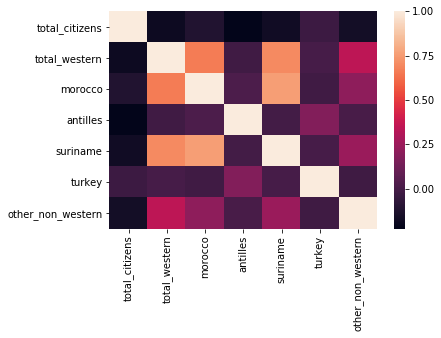

In [36]:
sns.heatmap(citizens_dh.corr())

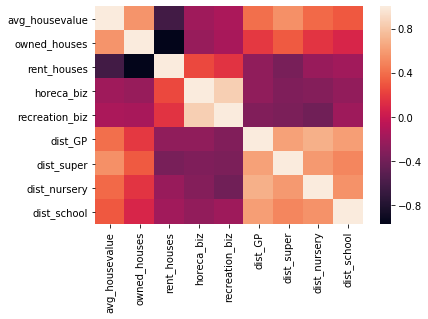

In [37]:
sns.heatmap(amenities_dh.corr())

In [38]:
citizens_dh.unstack(1)

total_citizens                                               \
buurtname  Archipelbuurt Arendsdorp Belgisch Park Bezuidenhout-Midden   
2015              5720.0     1310.0        7955.0              3970.0   
2016              5835.0     1295.0        8055.0              4025.0   
2017              5925.0     1315.0        8145.0              4050.0   
2018              6100.0     1305.0        8205.0              4285.0   
2019              6160.0     1365.0        8245.0              4500.0   

                                                                            \
buurtname Bezuidenhout-Oost Bezuidenhout-West Binckhorst Bloemenbuurt-Oost   
2015                 8940.0            3485.0      215.0            6305.0   
2016                 9015.0            3530.0     1240.0            6355.0   
2017                 9030.0            3615.0     1610.0            6440.0   
2018                 9010.0            3580.0     1790.0            6460.0   
2019                 9045.0            3610.0     2275.0            6495.0   

                                                    ... other_non_western  \
buurtname Bloemenbuurt-West Bohemen en Meer en Bos  ...        Waterbuurt   
2015                 2295.0                 4345.0  ...          0.000019   
2016                 2305.0                 4360.0  ...          0.000019   
2017                 2320.0                 4415.0  ...          0.000020   
2018                 2340.0                 4485.0  ...          0.000021   
2019                 2305.0                 4425.0  ...          0.000022   

                                                                 \
buurtname Westbroekpark Westvliet Willemspark Zeeheldenkwartier   
2015           0.000100       0.0    0.000067          0.000009   
2016           0.000098       NaN    0.000062          0.000010   
2017           0.000077       NaN    0.000069          0.000009   
2018           0.000084       NaN    0.000065          0.000009   
2019           0.000075       NaN    0.000069          0.000010   

                                                                               
buurtname Zijden, Steden en Zichten Zonne Veld Zorgvliet Zuiderpark   Zuidwal  
2015                       0.000014   0.000025  0.000203   0.000195  0.000024  
2016                       0.000014   0.000025  0.000193   0.000184  0.000026  
2017                       0.000014   0.000027  0.000187   0.000184  0.000026  
2018                       0.000016   0.000028  0.000180   0.000195  0.000025  
2019                       0.000017   0.000030  0.000178   0.000416  0.000026  

[5 rows x 819 columns]

In [39]:
amenities_dh.unstack(1)

avg_housevalue                                               \
buurtname  Archipelbuurt Arendsdorp Belgisch Park Bezuidenhout-Midden   
2015               376.0      483.0         294.0               244.0   
2016               388.0      498.0         298.0               250.0   
2017               407.0      529.0         312.0               267.0   
2018               443.0      567.0         339.0               277.0   
2019               506.0      647.0         370.0               323.0   

                                                                            \
buurtname Bezuidenhout-Oost Bezuidenhout-West Binckhorst Bloemenbuurt-Oost   
2015                  169.0             163.0       38.0             185.0   
2016                  172.0             168.0        NaN             186.0   
2017                  185.0             179.0       66.0             195.0   
2018                  203.0             193.0       77.0             212.0   
2019                  244.0             241.0      188.0             253.0   

                                                    ... dist_school  \
buurtname Bloemenbuurt-West Bohemen en Meer en Bos  ...  Waterbuurt   
2015                  262.0                  192.0  ...         0.6   
2016                  267.0                  195.0  ...         0.6   
2017                  278.0                  200.0  ...         0.6   
2018                  295.0                  215.0  ...         NaN   
2019                  347.0                  248.0  ...         NaN   

                                                                 \
buurtname Westbroekpark Westvliet Willemspark Zeeheldenkwartier   
2015                0.8       0.4         0.2               0.6   
2016                0.8       NaN         0.3               0.6   
2017                0.8       NaN         0.2               0.7   
2018                NaN       NaN         NaN               NaN   
2019                NaN       NaN         NaN               NaN   

                                                                             
buurtname Zijden, Steden en Zichten Zonne Veld Zorgvliet Zuiderpark Zuidwal  
2015                            0.3        0.5       0.3        0.5     0.4  
2016                            0.3        0.5       0.3        0.4     0.4  
2017                            0.3        0.5       0.3        0.5     0.4  
2018                            NaN        NaN       NaN        NaN     NaN  
2019                            NaN        NaN       NaN        NaN     NaN  

[5 rows x 1053 columns]

In [40]:
corr_df = pd.DataFrame()

In [41]:
for c in citizens_dh.columns:
    for a in amenities_dh.columns:
        print(c + " correlation with " + a)
        temp = pd.DataFrame(citizens_dh.unstack(1)[c].corrwith(amenities_dh.unstack(level=1)[a])).rename({0 : c+a}, axis =1)
        corr_df = pd.concat([corr_df, temp],axis=1)

total_citizens correlation with avg_housevalue
total_citizens correlation with owned_houses
total_citizens correlation with rent_houses
total_citizens correlation with horeca_biz
total_citizens correlation with recreation_biz
total_citizens correlation with dist_GP
total_citizens correlation with dist_super
total_citizens correlation with dist_nursery
total_citizens correlation with dist_school
total_western correlation with avg_housevalue
total_western correlation with owned_houses
total_western correlation with rent_houses
total_western correlation with horeca_biz
total_western correlation with recreation_biz
total_western correlation with dist_GP
total_western correlation with dist_super
total_western correlation with dist_nursery
total_western correlation with dist_school
morocco correlation with avg_housevalue
morocco correlation with owned_houses
morocco correlation with rent_houses
morocco correlation with horeca_biz
morocco correlation with recreation_biz
morocco correlation wi

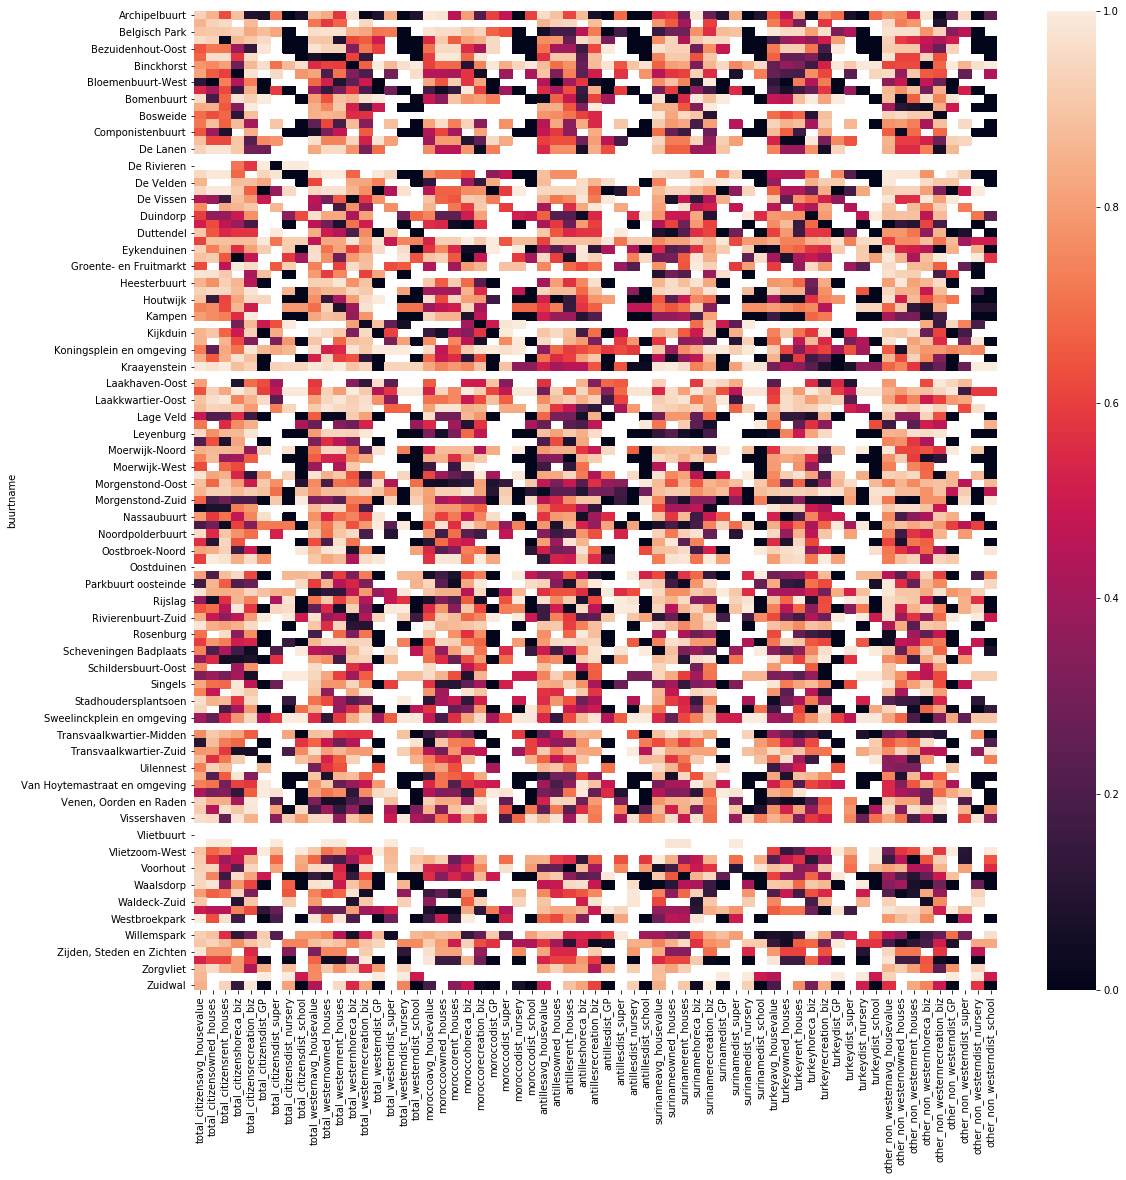

In [42]:
fig, ax = plt.subplots(figsize = (18, 18))

sns.heatmap(abs(corr_df), ax = ax)

buurtname
Archipelbuurt                AxesSubplot(0.125,0.125;0.775x0.755)
Arendsdorp                   AxesSubplot(0.125,0.125;0.775x0.755)
Belgisch Park                AxesSubplot(0.125,0.125;0.775x0.755)
Bezuidenhout-Midden          AxesSubplot(0.125,0.125;0.775x0.755)
Bezuidenhout-Oost            AxesSubplot(0.125,0.125;0.775x0.755)
                                             ...                 
Zijden, Steden en Zichten    AxesSubplot(0.125,0.125;0.775x0.755)
Zonne Veld                   AxesSubplot(0.125,0.125;0.775x0.755)
Zorgvliet                    AxesSubplot(0.125,0.125;0.775x0.755)
Zuiderpark                   AxesSubplot(0.125,0.125;0.775x0.755)
Zuidwal                      AxesSubplot(0.125,0.125;0.775x0.755)
Name: other_non_western, Length: 117, dtype: object

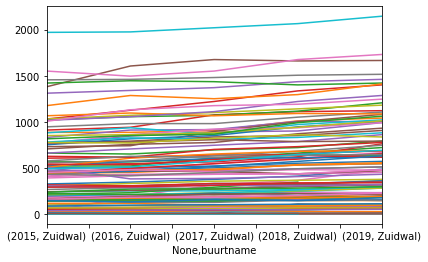

In [17]:
citizens_dh.groupby("buurtname")["other_non_western"].plot()